In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

solaria = df[df['empresa'] == 'Solaria']

solaria.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

solaria = solaria [['date','open','high','low','close','adj close']]

solaria.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

solaria['date'] = pd.to_datetime(solaria['date'], format="%Y-%m-%d")

solaria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 40030 to 41354
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

solaria.sort_values(by='date',ascending= True, inplace=True)

solaria.head()

,date,open,high,low,close,adj close
40805,2019-01-02,3.950,4.270,3.89,4.255,4.255
40806,2019-01-03,4.230,4.395,4.12,4.165,4.165
40807,2019-01-04,4.180,4.720,4.18,4.625,4.625
40821,2019-01-07,4.660,4.950,4.62,4.850,4.850
40820,2019-01-08,4.845,5.010,4.53,4.685,4.685


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

solaria = solaria[(solaria['date'] >= fecha_inicio) & (solaria['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

solaria.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=solaria['date'].min(), end=solaria['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

solaria = solaria.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

solaria = solaria.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

solaria.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,23.559999,24.860001,23.559999,24.520000,24.520000
1,2021-01-05,24.820000,26.700001,24.680000,26.580000,26.580000
2,2021-01-06,27.000000,28.420000,26.799999,28.240000,28.240000
3,2021-01-07,28.200001,31.059999,28.139999,30.940001,30.940001
4,2021-01-08,29.100000,29.340000,26.320000,26.760000,26.760000
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,26.500000,27.219999,25.379999,26.260000,26.260000
8,2021-01-12,26.540001,27.219999,25.520000,25.879999,25.879999
9,2021-01-13,25.760000,27.219999,25.719999,27.139999,27.139999


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

solaria = solaria.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


solaria.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,23.559999,24.860001,23.559999,24.520000,24.520000
1,2021-01-05,24.820000,26.700001,24.680000,26.580000,26.580000
2,2021-01-06,27.000000,28.420000,26.799999,28.240000,28.240000
3,2021-01-07,28.200001,31.059999,28.139999,30.940001,30.940001
4,2021-01-08,29.100000,29.340000,26.320000,26.760000,26.760000
5,2021-01-09,29.100000,29.340000,26.320000,26.760000,26.760000
6,2021-01-10,29.100000,29.340000,26.320000,26.760000,26.760000
7,2021-01-11,26.500000,27.219999,25.379999,26.260000,26.260000
8,2021-01-12,26.540001,27.219999,25.520000,25.879999,25.879999
9,2021-01-13,25.760000,27.219999,25.719999,27.139999,27.139999


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

solaria = solaria.set_index('date')

solaria.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,23.559999,24.860001,23.559999,24.520000,24.520000
2021-01-05,24.820000,26.700001,24.680000,26.580000,26.580000
2021-01-06,27.000000,28.420000,26.799999,28.240000,28.240000
2021-01-07,28.200001,31.059999,28.139999,30.940001,30.940001
2021-01-08,29.100000,29.340000,26.320000,26.760000,26.760000
2021-01-09,29.100000,29.340000,26.320000,26.760000,26.760000
2021-01-10,29.100000,29.340000,26.320000,26.760000,26.760000
2021-01-11,26.500000,27.219999,25.379999,26.260000,26.260000
2021-01-12,26.540001,27.219999,25.520000,25.879999,25.879999


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

solaria.index = pd.DatetimeIndex(solaria.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

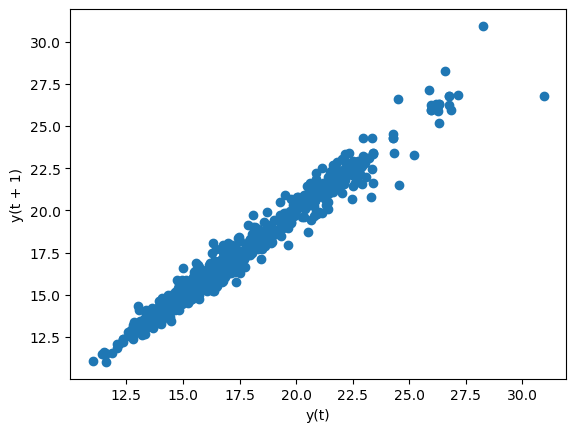

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(solaria.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = solaria.close[:-10], solaria.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(solaria.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    12.125089
2024-02-22    12.179459
2024-02-23    12.233120
2024-02-24    12.286081
2024-02-25    12.338351
2024-02-26    12.389940
2024-02-27    12.440856
2024-02-28    12.491107
2024-02-29    12.540703
2024-03-01    12.589653
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    12.070
2024-02-22    11.870
2024-02-23    11.565
2024-02-24    11.565
2024-02-25    11.565
2024-02-26    11.410
2024-02-27    11.505
2024-02-28    11.605
2024-02-29    11.020
2024-03-01    11.050
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.8389357894411861

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,12.070,12.125089,0.055089
2024-02-22,11.870,12.179459,0.309459
2024-02-23,11.565,12.233120,0.668120
2024-02-24,11.565,12.286081,0.721081
2024-02-25,11.565,12.338351,0.773351
2024-02-26,11.410,12.389940,0.979940
2024-02-27,11.505,12.440856,0.935856
2024-02-28,11.605,12.491107,0.886107
2024-02-29,11.020,12.540703,1.520703
2024-03-01,11.050,12.589653,1.539653
